## Artificial Intelligence - Computer Assignment 04: Machine Learning

# Data Analytics

### Q1. Get the general structure of the data.

First we import pandas and read our dataset file. Then we show the first 10 rows of the table. 

In [1]:
import pandas as pd

df = pd.read_excel('DataSet.xlsx')
df.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7     NaN   2.94  33.4  
4     18.7  396.90   5.33  36.2  
5     18.7  394.12   5.21  28.7  
6     15.2  395.60  12.43  22.9  
7     15.2  396.90  19.15  27.1  
8     15.2  386.63  29.93  16.5  
9     15.2  386.71  17.10  18.9

With info() method we get a summary of our DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


Now with discribe() method we collect a statistically description of the data. The description contains these information:
- count (The number of not-empty values)
- mean (The average value)
- std (The standard deviation)
- min (the minimum value)
- 25% (The 25% percentile)
- 50% (The 50% percentile)
- 75% (The 75% percentile)
- max (The maximum value).

In [3]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  480.000000  506.000000  506.000000   
mean     1.269195   13.295257    9.205158    0.175000    1.101175   15.679800   
std      2.399207   23.048697    7.169630    0.380364    1.646991   27.220206   
min      0.000000    0.000000    0.000000    0.000000    0.385000    3.561000   
25%      0.049443    0.000000    3.440000    0.000000    0.449000    5.961500   
50%      0.144655    0.000000    6.960000    0.000000    0.538000    6.322500   
75%      0.819623   18.100000   18.100000    0.000000    0.647000    6.949000   
max      9.966540  100.000000   27.740000    1.000000    7.313000  100.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  479.000000  506.000000  506.000000  506.000000  486.000000   
mean    58.744660    6.211663   78.063241  339.317787   42.614980  336.820947   
std     33.104049    6.527286  203.542157  180.670077   87.585243  121.174519   
min      1.137000    1.129600    1.000000   20.200000    2.600000    0.320000   
25%     32.000000    2.425900    4.000000  254.000000   17.000000  370.415000   
50%     65.250000    3.917500    5.000000  307.000000   18.900000  390.885000   
75%     89.975000    6.341400   24.000000  403.000000   20.200000  395.630000   
max    100.000000   24.000000  666.000000  711.000000  396.900000  396.900000   

            LSTAT        MEDV  
count  506.000000  452.000000  
mean    11.537806   23.750442  
std      6.064932    8.808602  
min      1.730000    6.300000  
25%      6.877500   18.500000  
50%     10.380000   21.950000  
75%     15.015000   26.600000  
max     34.410000   50.000000

### Q2. Some columns of the table may have missing data. Find the number and proportion of these data.

In [4]:
def missing_values(df):   
    num = len(df)
    null_values_count = df.isna().sum()
    null_values_percent = null_values_count / num
    null_values = pd.concat([null_values_count, null_values_percent], axis=1, keys=["Num of Missing Values", "Proportion"])
    return null_values

missing_values(df)

Num of Missing Values  Proportion
CRIM                         0    0.000000
ZN                           0    0.000000
INDUS                        0    0.000000
CHAS                        26    0.051383
NOX                          0    0.000000
RM                           0    0.000000
AGE                          0    0.000000
DIS                         27    0.053360
RAD                          0    0.000000
TAX                          0    0.000000
PTRATIO                      0    0.000000
B                           20    0.039526
LSTAT                        0    0.000000
MEDV                        54    0.106719

In [5]:
new_df = missing_values(df)

for i in range(len(new_df)):
    if new_df.iloc[i, 0] > 0:
        print(f"Number of missing data in attribute [{new_df.index[i]}] is: {new_df.iloc[i, 0]}")
        print(f"Porportion of missing data in attribute [{new_df.index[i]}] is: {round(new_df.iloc[i, 1], 4)}")

Number of missing data in attribute [CHAS] is: 26
Porportion of missing data in attribute [CHAS] is: 0.0514
Number of missing data in attribute [DIS] is: 27
Porportion of missing data in attribute [DIS] is: 0.0534
Number of missing data in attribute [B] is: 20
Porportion of missing data in attribute [B] is: 0.0395
Number of missing data in attribute [MEDV] is: 54
Porportion of missing data in attribute [MEDV] is: 0.1067


### Q3. Graph the number of unique values ​​for each attribute and explain them.

As we can see below, in attributes like:
- CRIM (per capita crime rate by town)
- RM (average number of rooms per dwelling)
- AGE (proportion of owner-occupied units built prior to 1940)
- DIS (weighted distances to five Boston employment centers)
- B (1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town)
- LSTAT (% lower status of the population)

number of unique values is high. It means these atrributes have different and diverse values.

On the other hand in attributes like:
- ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)
- INDUS (proportion of nonretail business acres per town)
- CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))
- RAD (index of accessibility to radial highways)
- TAX (full-value property-tax rate per $10,000)
- PTRATIO (pupil-teacher ratio by town)

the number of unique values are very low. It means that in these attributes, values are very similar and not inverse.

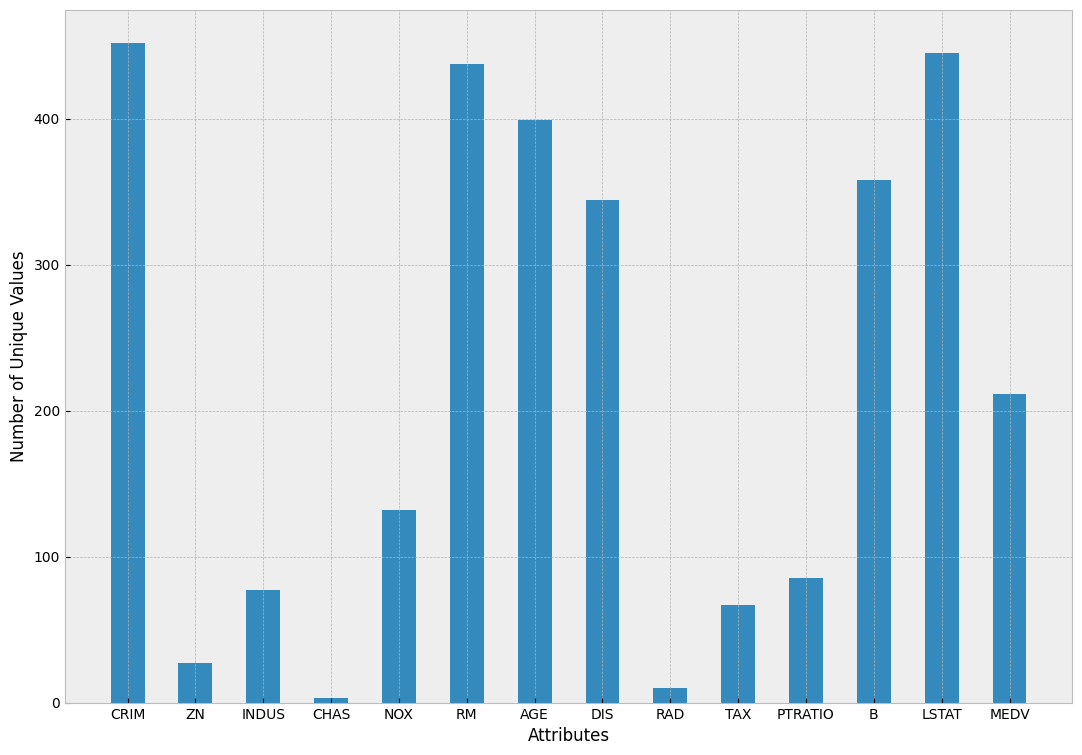

In [6]:
import matplotlib.pyplot as plt
from matplotlib import style

plt.style.use('bmh')

columns = []
num_unique_val = []
for col in df.columns:
    columns.append(col)
    num_unique_val.append(len(df[col].unique()))
plt.figure(figsize=(13, 9))
plt.bar(columns, num_unique_val, width = 0.5)
plt.xlabel("Attributes")
plt.ylabel("Number of Unique Values")
plt.show()

### Q4. Draw a diagram of the correlation of the features on each other. Explain about this diagram and tell which features are more dependent on the target column? 

To calculate the correlation of the features, we use pandas' corr() method. The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns. We use seaborn library to plot correlation heatmamp. As explained in the tabel beside the heatmap, brighter collers mean higher correlation numbers. The number varies from -1 to 1. 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well. numbers near 0 means not a good relationship, meaning that if one value goes up does not mean that the other will. Lower numbers like -0.85 also would be good relationships but with this difference that if you increase one value, the other will probably go down.

As we can see the RM feature is the most dependent to the target table. After that LSTAT is the most correlated feature but it has a negative correlation meaning that if we decrease it the target feature will increase.

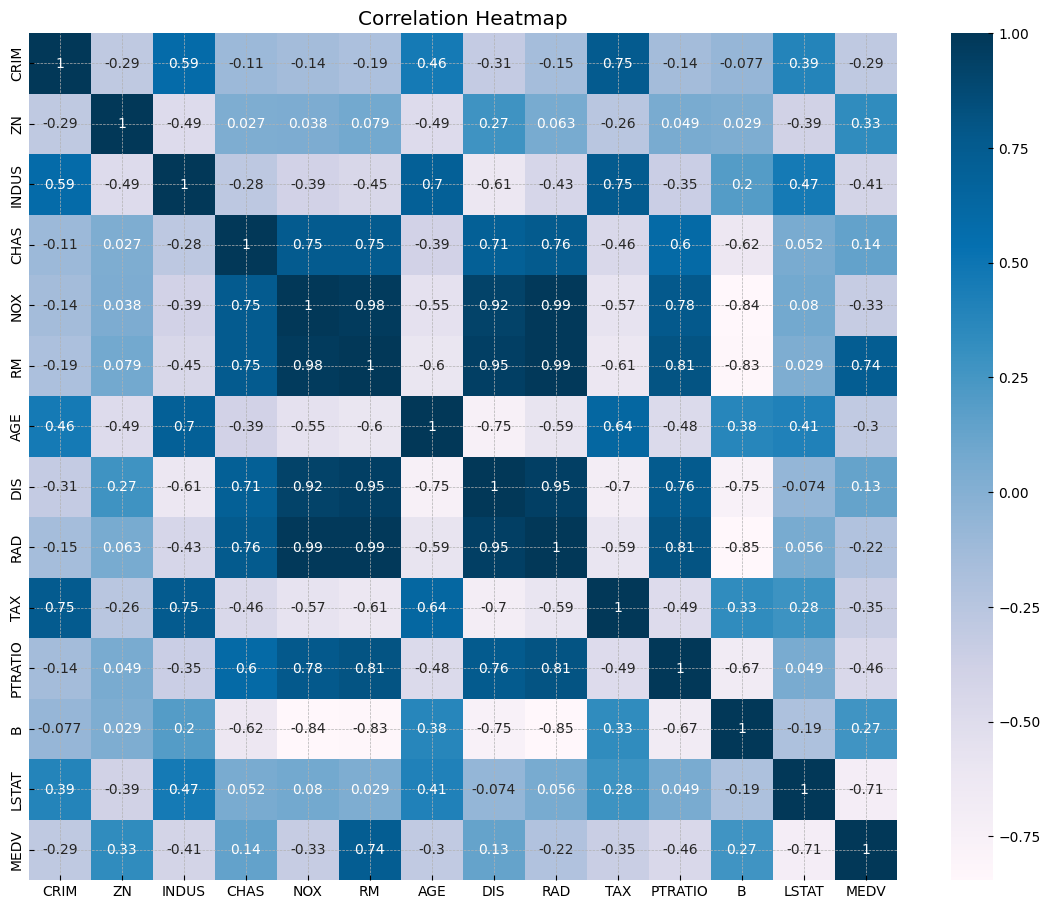

In [7]:
import seaborn as sb
  
plt.figure(figsize=(14, 11))
sb.heatmap(df.corr(), annot=True, cmap="PuBu") 
plt.title(f'Correlation Heatmap')
  
plt.show()

### Q5. Scatter and hexbin plots are usually used to analyse the relation between features. Use them to analyse correlations to target table. Explain the use and meaning of each.

Scatter plots how individual data points as dots and are useful for identifying patterns, trends, and outliers in the data. They help assess correlation between variables. On the other hand, hexbin plots divide the data space into hexagonal bins, providing a smoother representation of data density and handling overplotting in large datasets. They aid in identifying patterns, clusters, and correlation between variables.

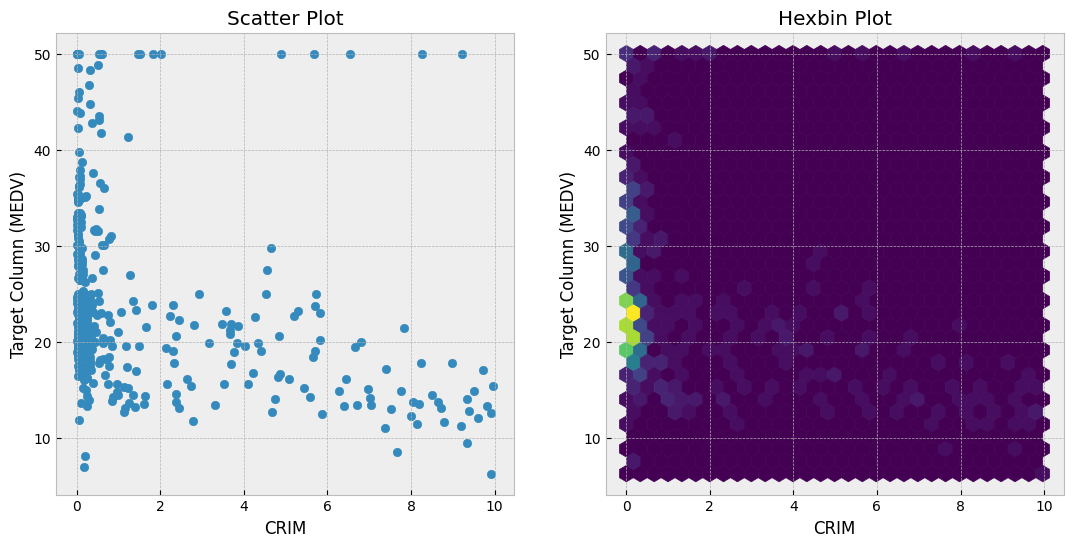

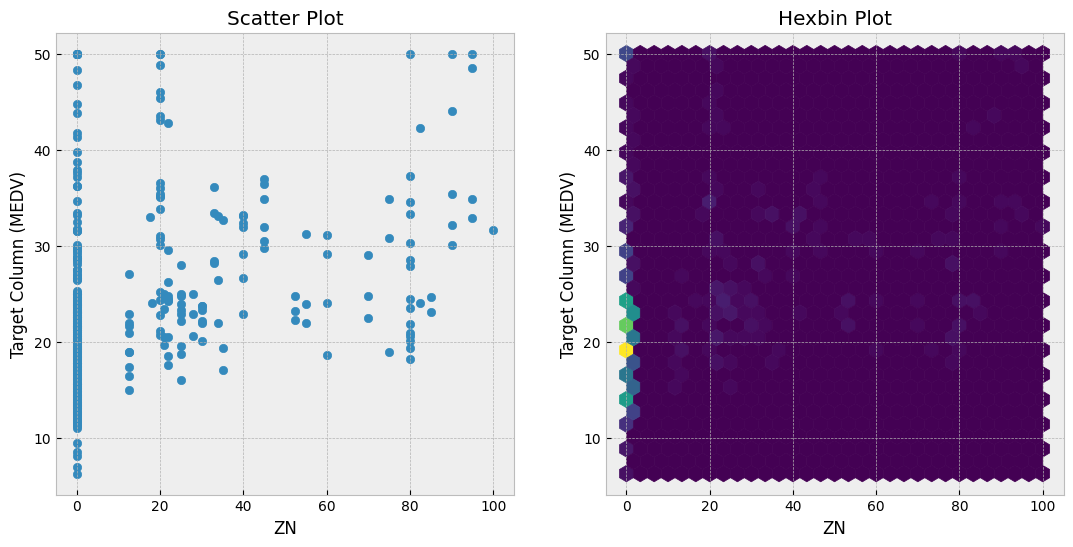

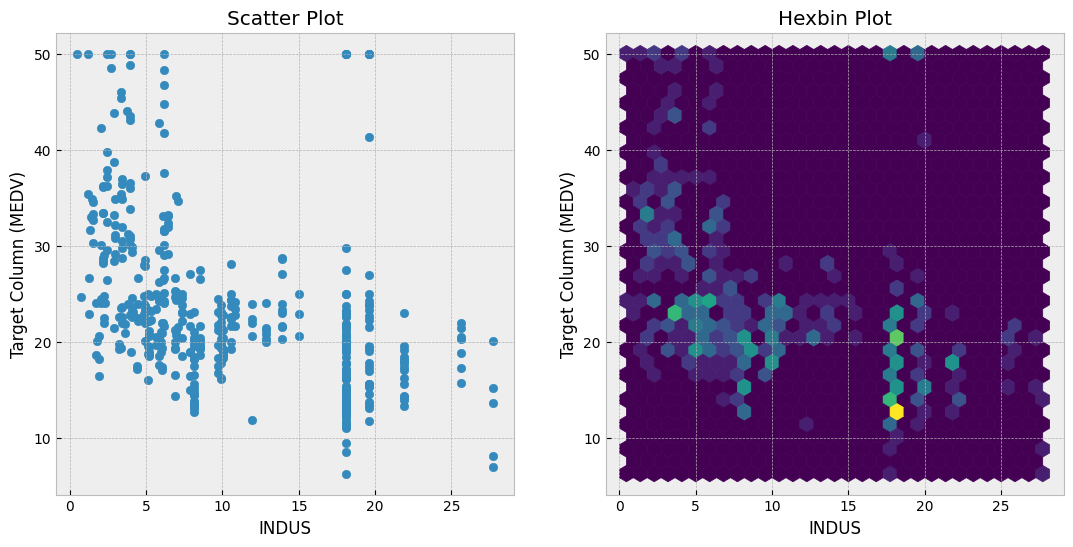

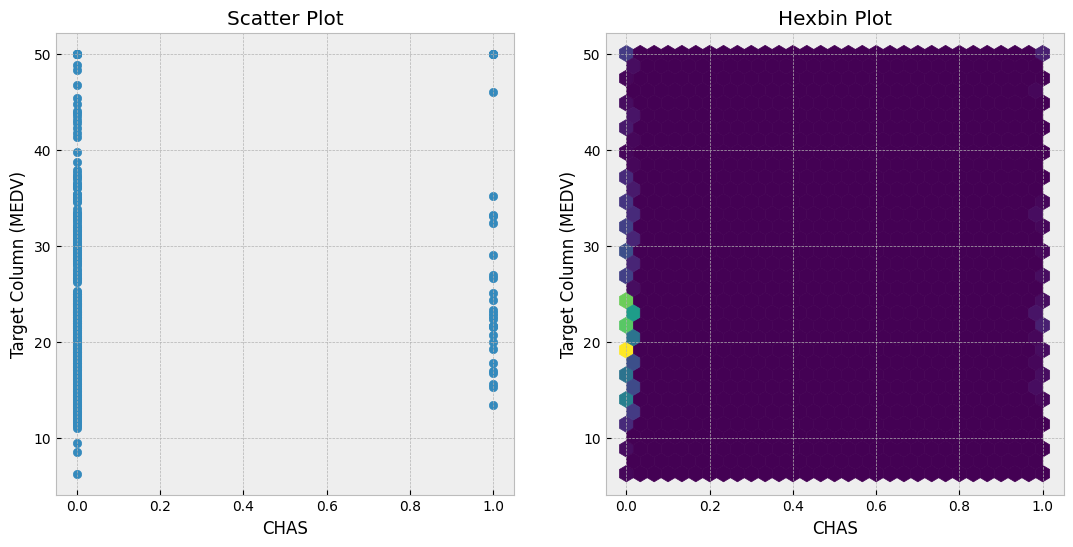

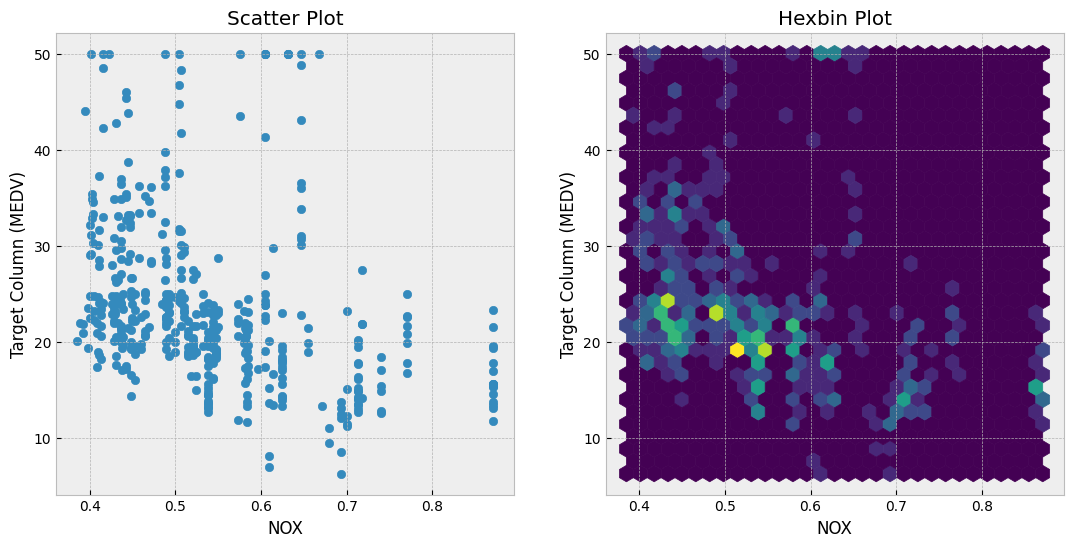

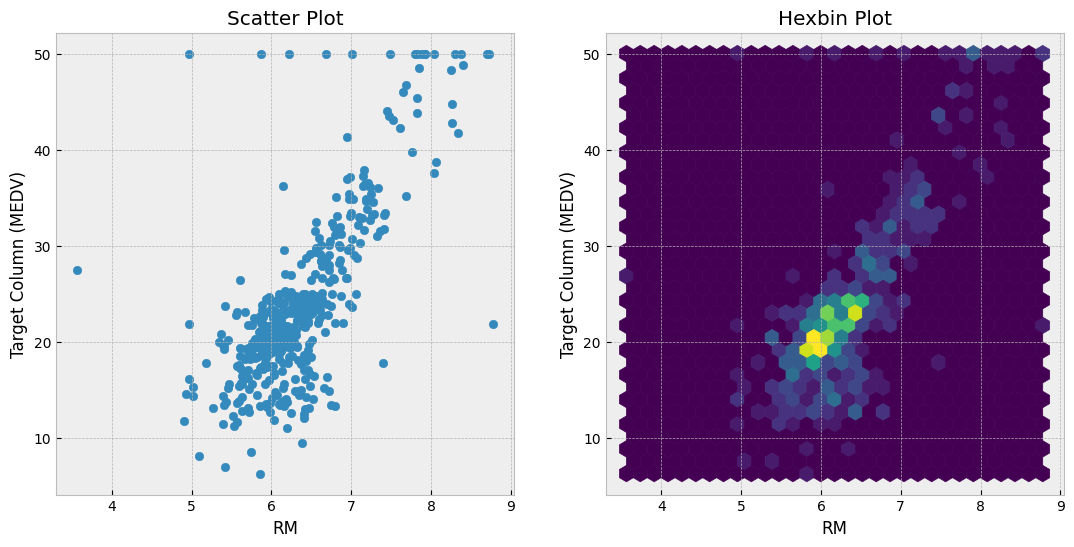

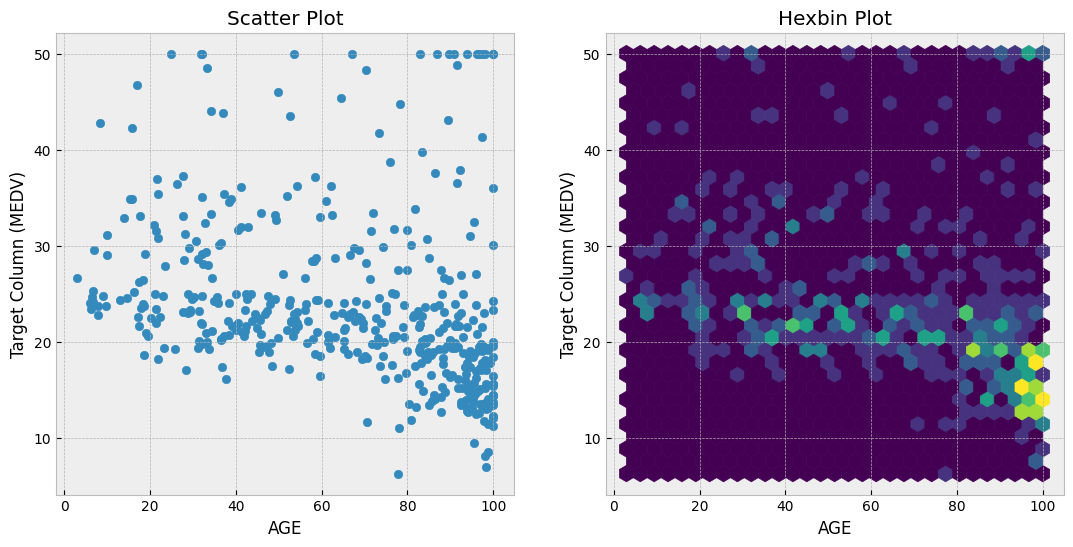

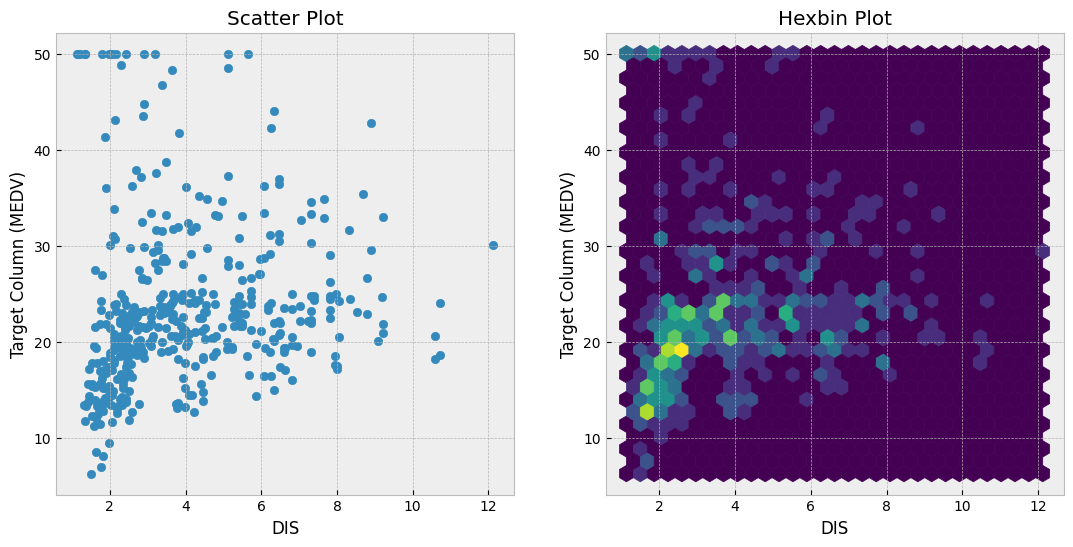

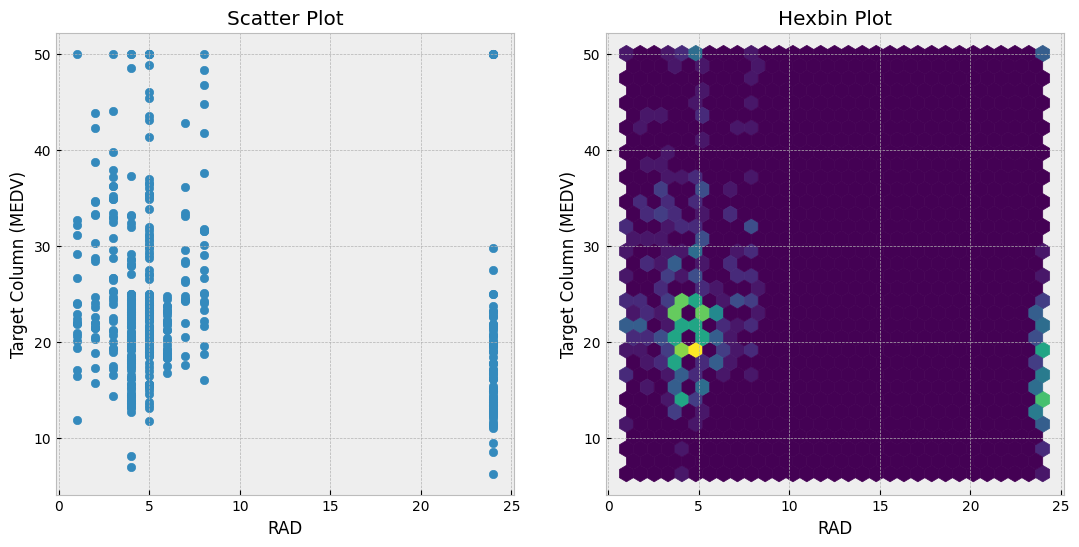

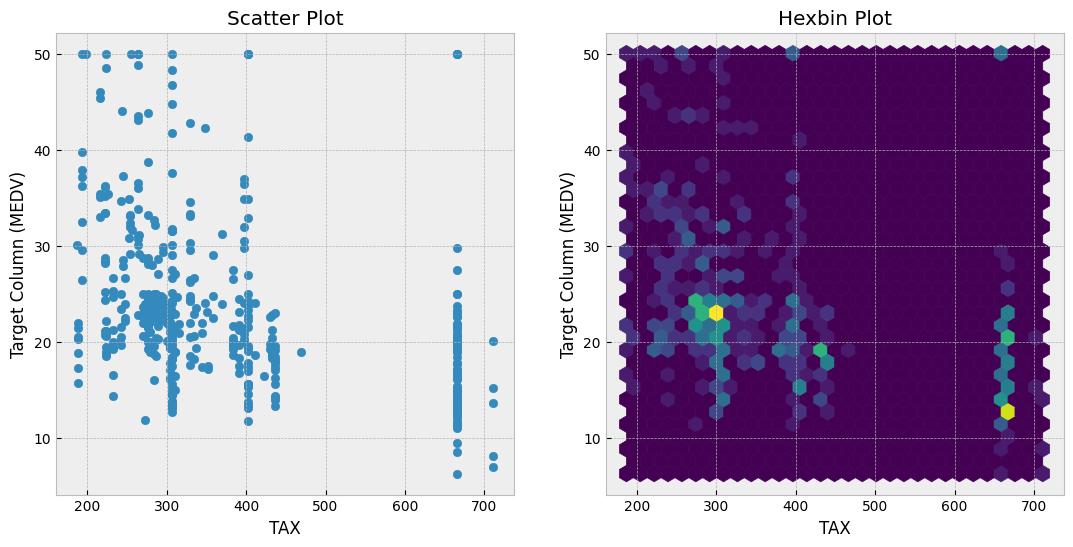

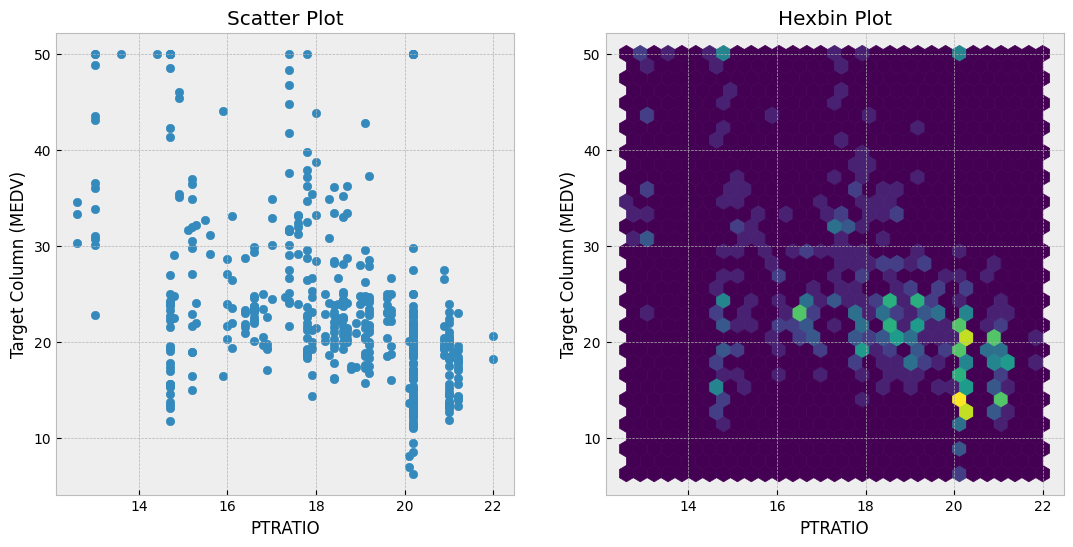

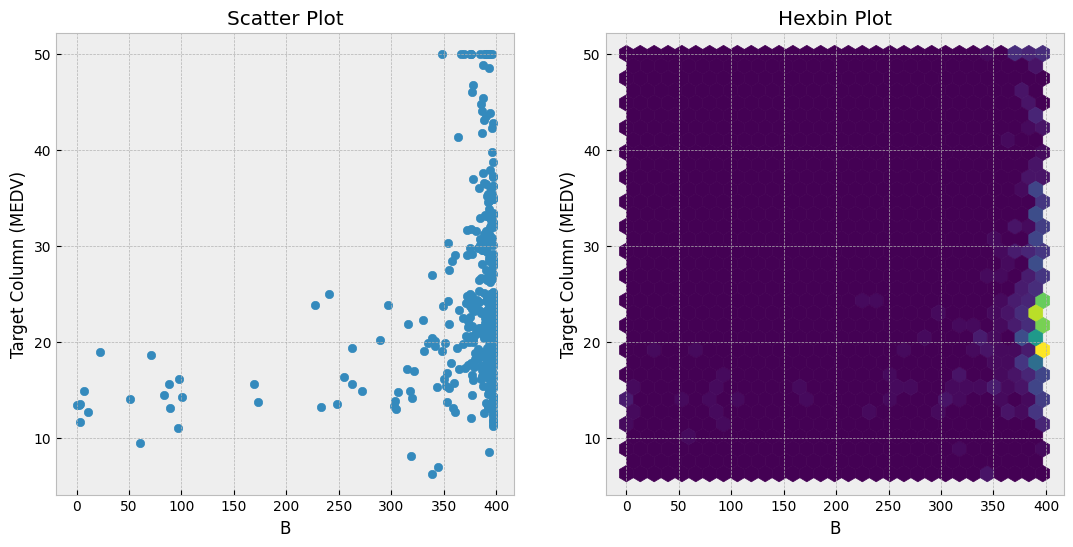

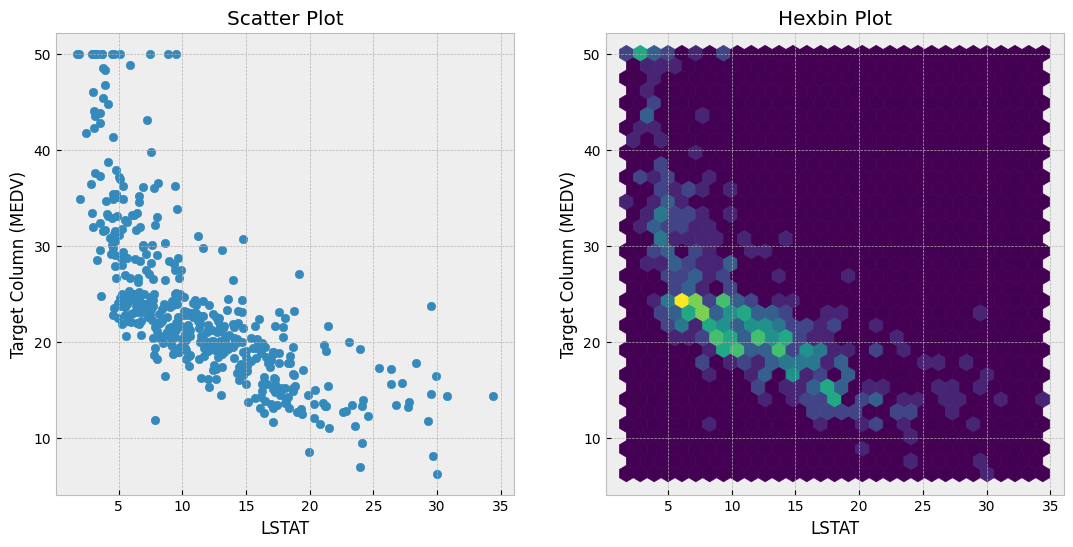

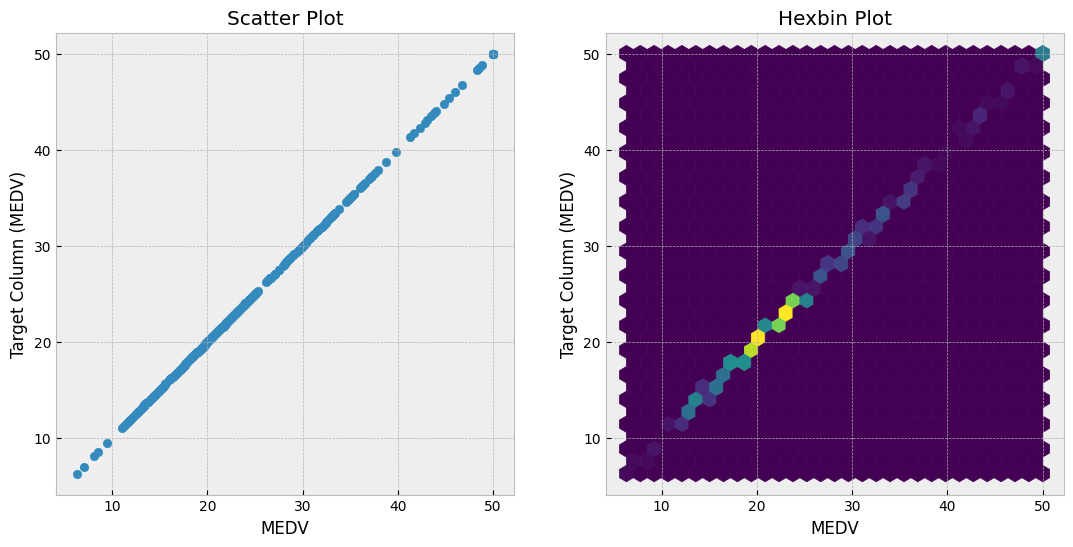

In [8]:
def scatter_hexbin_plt(feature):
    fig = plt.figure(figsize=(13, 6))
    fig.add_subplot(1, 2, 1)
    plt.scatter(df[col], df['MEDV'])
    plt.title('Scatter Plot')
    plt.xlabel(feature)
    plt.ylabel('Target Column (MEDV)')

    fig.add_subplot(1, 2, 2) 
    plt.hexbin(df[col], df['MEDV'], gridsize=30)
    plt.title('Hexbin Plot')
    plt.xlabel(feature)
    plt.ylabel('Target Column (MEDV)')

    plt.show()

for col in df.columns:
    scatter_hexbin_plt(col)

### Q6. Research other analysis you can use for the dataset and implement one of them. 

Exploratory Data Analysis (EDA) involves various methods. I mention here some additional techniques we can use in EDA:
- Histograms: Histograms display the distribution of a single numerical variable by dividing the data into bins and counting the number of observations in each bin. They help visualize the shape, central tendency, and spread of the data.
- Box Plots (Box-and-Whisker Plots): Box plots provide a visual summary of the distribution of a numerical variable, including median, quartiles, and potential outliers. They are useful for comparing the distributions of multiple variables or groups.
- Bar Plots: Bar plots represent categorical data by showing the frequency or proportion of each category as bars. They are effective for visualizing the distribution of categorical variables or comparing groups.
- Violin Plots: Violin plots combine the features of box plots and kernel density plots to display the distribution of numerical data across different levels of a categorical variable. They provide a more informative summary of the data distribution compared to traditional box plots.

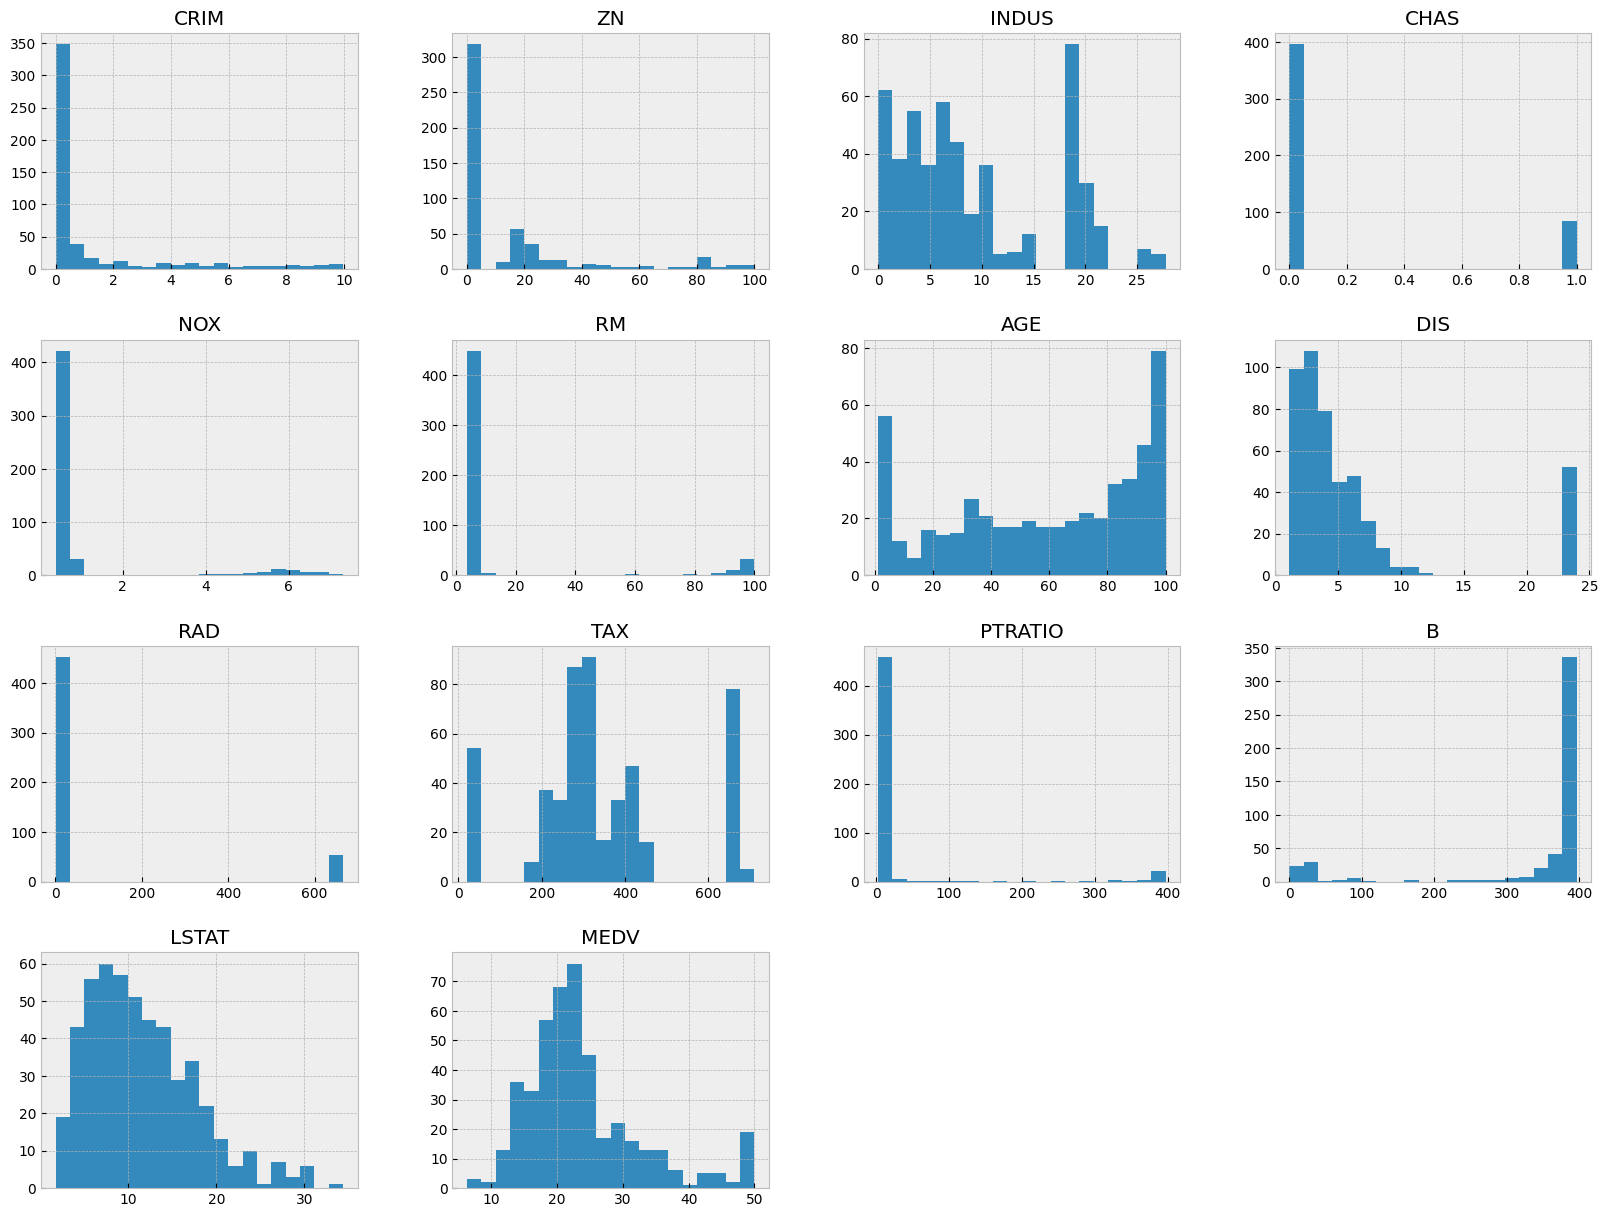

In [9]:
df.hist(bins=20, figsize=(20,15))
plt.show()

# Dataset Preprocessing

### Q7. Explain methods of filling Missing Values. Implement at least three methods. Briefly explain the reason for using each method.

Filling missing values in a dataset is a crucial preprocessing step in data analysis. Here are two main ways to handle missing data:
1. `Deletion`: This involves removing rows or columns with missing values. This is a straightforward method, but it can be problematic if a significant portion of our data is missing. Discarding too much data can affect the reliability of our conclusions. Here are the two methods:
- **Row Deletion (Listwise Deletion):**<br>
Also known as complete case analysis, listwise deletion removes entire rows containing any missing values. This approach ensures that only complete cases are used in the analysis. While straightforward, listwise deletion may lead to loss of valuable information, especially if the missing values are not randomly distributed.
- **Column Deletion (Variable Deletion):**<br>
Column deletion involves removing entire columns (features) that contain a significant number of missing values. This approach is suitable when the missingness is universal across a feature and the feature is not critical for the analysis or modeling task.

2. `Imputation`: This replaces missing values with estimates. There are various imputation techniques, each with its strengths and weaknesses. Here are some common ones:
- **Mean/Median/Mode Imputation:**<br>
Replace missing entries with the average (mean), middle value (median), or most frequent value (mode) of the corresponding column.
This is a quick and easy approach, but it can introduce bias if the missing data is not randomly distributed.
- **Forward Fill (or Backward Fill) Imputation:**<br>
In time-series data, missing values can often be filled by carrying forward the last observed value (forward fill) or by using the next observed value (backward fill). This method assumes that the missing values have the same value as the most recent observed value.
- **Interpolation:**<br>
Interpolation methods estimate missing values based on the values of neighboring data points. Linear interpolation assumes a linear relationship between consecutive data points and fills missing values with values that lie on the line connecting the neighboring points. Polynomial interpolation fits a polynomial curve to the data and uses it to estimate missing values.
- **Hot-Deck Imputation:**<br>
In hot-deck imputation, missing values are replaced with values from similar records in the dataset. Similarity can be determined based on distance metrics such as Euclidean distance or cosine similarity. Alternatively, clustering algorithms can be used to group similar records together, and missing values can be replaced with values from the same cluster.
- **K-Nearest Neighbors (KNN Imputation):**<br>
This method finds the closest data points (neighbors) based on available features and uses their values to estimate the missing value. KNN is useful when you have a lot of data and the missing values are scattered.

In [10]:
missing_values(df)

Num of Missing Values  Proportion
CRIM                         0    0.000000
ZN                           0    0.000000
INDUS                        0    0.000000
CHAS                        26    0.051383
NOX                          0    0.000000
RM                           0    0.000000
AGE                          0    0.000000
DIS                         27    0.053360
RAD                          0    0.000000
TAX                          0    0.000000
PTRATIO                      0    0.000000
B                           20    0.039526
LSTAT                        0    0.000000
MEDV                        54    0.106719

- method 1: Using Both Median and Mode Imputation:<br>
Since the missingness in the features is relatively small compared to the total number of observations, we can use Median imputation for these features. Median imputation is robust to outliers and may be preferable if the distribution is skewed. Also since CHAS feature is categorical variable with only two values (0 or 1), mode imputation could be a better choice. Mode imputation replaces missing values with the most frequent value in the feature, which is suitable for categorical data.

In [11]:
def Median_Mode(df: pd.DataFrame):
    mode_value = df['CHAS'].mode()[0]
    df['CHAS'] = df['CHAS'].fillna(mode_value)

    median_value = df.median()
    return df.fillna(median_value)

new_df1 = df.copy()
new_df1 = Median_Mode(new_df1)
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


- method 2: Linear Interpolation

In [12]:
new_df2 = df.copy()
new_df2 = new_df2.interpolate(method ='linear', limit_direction ='forward') 
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


- method 3: Dropping Rows:<br>
It's not an ideal nethod. So many rows and information would disapear.

In [13]:
def deleting_rows(df: pd.DataFrame):
    return df.dropna(axis = 0, how ='any')

new_df3 = df.copy()
new_df3 = deleting_rows(df)
new_df3.info()
print("\nOld data frame length:", len(df)) 
print("New data frame length:", len(new_df3))  
print("Number of deleted rows: ", (len(df)-len(new_df3))) 

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     391 non-null    float64
 1   ZN       391 non-null    float64
 2   INDUS    391 non-null    float64
 3   CHAS     391 non-null    float64
 4   NOX      391 non-null    float64
 5   RM       391 non-null    float64
 6   AGE      391 non-null    float64
 7   DIS      391 non-null    float64
 8   RAD      391 non-null    int64  
 9   TAX      391 non-null    float64
 10  PTRATIO  391 non-null    float64
 11  B        391 non-null    float64
 12  LSTAT    391 non-null    float64
 13  MEDV     391 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 45.8 KB

Old data frame length: 506
New data frame length: 391
Number of deleted rows:  115


### Q8. Is it possible to delete some columns? Why? If this is possible, delete them by mentioning the reason.

Columns with a high percentage of missing values and low correlation with target column, may not provide reliable information. So since CHAS has 480 non-null values out of 506, it has a relatively high number of missing values and its correlation value is 0.14 so it could be deleted. Also DIS has 479 non-null values out of 506, indicating a significant number of missing values and its correlation value is 0.13 so it could be deleted.

In [14]:
new_df4 = df.copy()
new_df4 = new_df4.drop(columns=['CHAS', 'DIS'])
new_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   RAD      506 non-null    int64  
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        486 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     452 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 47.6 KB


### Q9. Which features are called numerical and which are called categorical? What is the difference between these two types of features? Specify numberical and categorical features in this data set.

**Numerical Features:**<br>
Numerical features are those that represent some sort of quantitative measurement and can be ordered and measured. They can be divided into:
- Continuous: These can take any value within a range (e.g., height, weight, temperature).
- Discrete: These take distinct, separate values (e.g., number of children, number of cars).<br>

**Categorical Features:**<br>
Categorical features represent qualitative data and are often divided into categories. They can be:
- Nominal: These have no inherent order (e.g., color, gender).
- Ordinal: These have a meaningful order but no consistent difference between values (e.g., ratings, rankings).<br>

**Differences Between Numerical and Categorical Features:**<br>
- Numerical Features: Can be used for arithmetic operations, have meaningful averages, standard deviations, etc.<br>
- Categorical Features: Represent groups or categories, and typically need to be encoded into numerical values for machine learning models.<br>

Most of the features in the dataset are numerical, as they represent quantitative measurements: CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, and MEDV.<br>
One categorical fatures is: CHAS.<br>
CHAS: This is a binary categorical feature indicating whether the tract bounds the Charles River (0 = no, 1 = yes).<br>

### Q10. What is normalizing or standardizing for in numerical features? What is the difference between these two methods? Should we use them in this project? 

Normalizing and standardizing are techniques used to rescale numerical features, often to improve the performance of machine learning algorithms.<br>

**Normalizing**<br>
- Purpose: To rescale the features to a fixed range, typically [0, 1] or [-1, 1].
- Method: Each feature value is transformed using the formula:
$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$
- Use Cases: Useful when the algorithms do not assume any specific distribution of the data (e.g., k-nearest neighbors, neural networks).<br>

**Standardizing**
- Purpose: To rescale the features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1.
- Method: Each feature value is transformed using the formula:
$$X_{std} = \frac{X - \mu}{\sigma}$$
where X is the original value, 𝜇 is the mean of the feature, and σ is the standard deviation of the feature.
- Use Cases: Useful for algorithms that assume or perform better when the data is normally distributed (e.g., linear regression, logistic regression, support vector machines).<br>

**Difference Between Normalizing and Standardizing**<br>
- Range:
Normalizing scales the data to a fixed range, typically [0, 1] or [-1, 1].
Standardizing scales the data to have a mean of 0 and a standard deviation of 1.
- Effect:
Normalizing affects the scale of the data but retains the relative differences between data points.
Standardizing shifts and scales the data so that it resembles a standard normal distribution.<br>

**Should we use them?**
Since the range of values in the dataset is wide, it is generally better to normalize or standardize the data to ensure that no feature dominates due to its scale. This preprocessing step can significantly improve the performance and convergence speed of our algorithms.<br>
Algorithms like Linear Regression and SVM often perform better when features are standardized because they assume data is normally distributed and require comparability across features so we standardize features for them.<br>
k-Nearest Neighbors algorithm can benefit from normalization because it's distance-based and sensitive to the scale of the features so we normalize features for it.

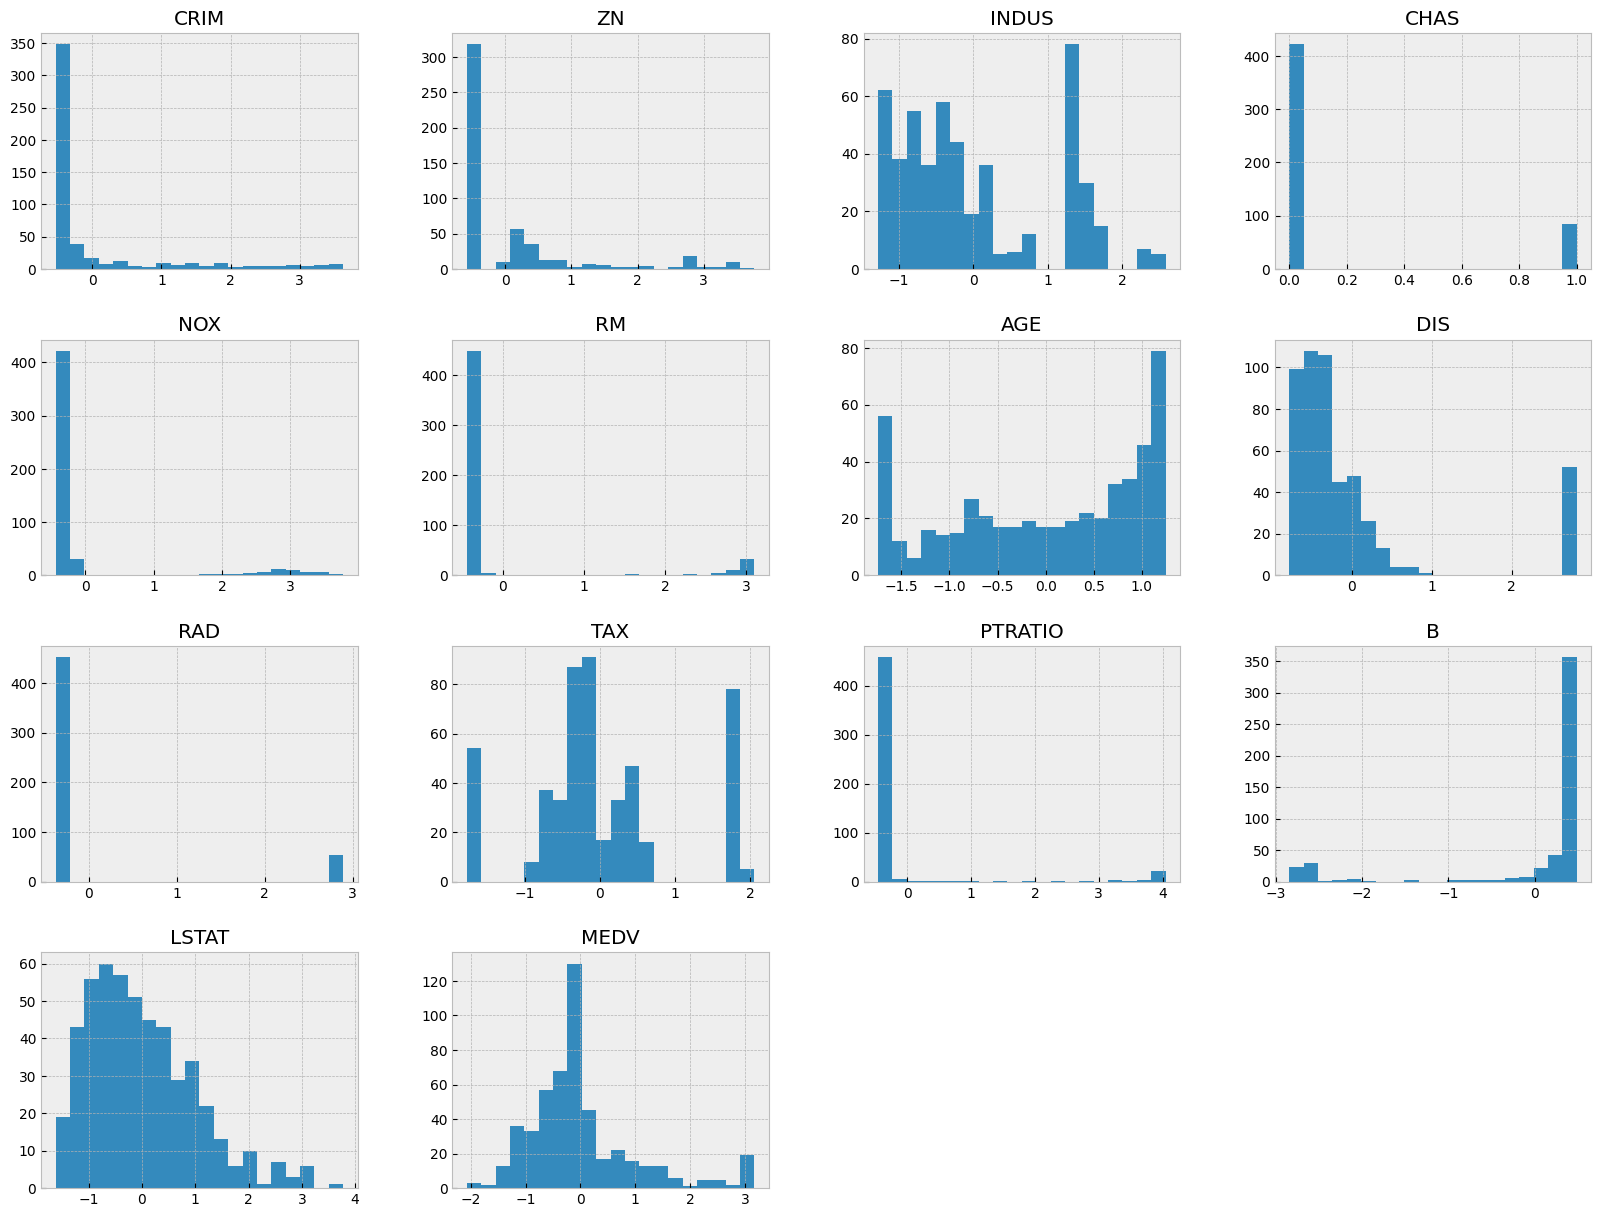

CRIM            ZN         INDUS        CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  506.000000  5.060000e+02   
mean   5.616939e-17  1.404235e-17  2.246775e-16    0.166008 -5.616939e-17   
std    1.000990e+00  1.000990e+00  1.000990e+00    0.372456  1.000990e+00   
min   -5.295298e-01 -5.774042e-01 -1.285180e+00    0.000000 -4.352691e-01   
25%   -5.089015e-01 -5.774042e-01 -8.049040e-01    0.000000 -3.963719e-01   
50%   -4.691773e-01 -5.774042e-01 -3.134583e-01    0.000000 -3.422804e-01   
75%   -1.875694e-01  2.086668e-01  1.241856e+00    0.000000 -2.760336e-01   
max    3.628679e+00  3.765529e+00  2.587747e+00    1.000000  3.775354e+00   

                 RM         AGE           DIS           RAD           TAX  \
count  5.060000e+02  506.000000  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -2.808469e-17    0.000000  2.808469e-17 -2.808469e-17 -4.212704e-17   
std    1.000990e+00    1.000990  1.000990e+00  1.000990e+00  1.000990e+00   
min   -4.456540e-01   -1.741922 -7.792016e-01 -3.789854e-01 -1.768049e+00   
25%   -3.573785e-01   -0.808696 -5.683309e-01 -3.642318e-01 -4.726971e-01   
50%   -3.441032e-01    0.196706 -3.411995e-01 -3.593140e-01 -1.790544e-01   
75%   -3.210645e-01    0.944333  2.633172e-02 -2.658749e-01  3.528267e-01   
max    3.100772e+00    1.247466  2.813927e+00  2.891384e+00  2.059279e+00   

            PTRATIO           B         LSTAT          MEDV  
count  5.060000e+02  506.000000  5.060000e+02  5.060000e+02  
mean   2.808469e-17    0.000000 -6.494585e-17 -9.829643e-17  
std    1.000990e+00    1.000990  1.000990e+00  1.000990e+00  
min   -4.573211e-01   -2.843304 -1.618734e+00 -2.070665e+00  
25%   -2.927471e-01    0.278964 -7.691625e-01 -5.469087e-01  
50%   -2.710325e-01    0.435996 -1.910907e-01 -1.929652e-01  
75%   -2.561751e-01    0.475563  5.738951e-01  1.729763e-01  
max    4.049034e+00    0.486499  3.774952e+00  3.172497e+00

In [15]:
from sklearn.preprocessing import StandardScaler

def standardize(df):
    std_scaler = StandardScaler()
    numerical_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    df[numerical_features] = std_scaler.fit_transform(df[numerical_features])
    return df

std_df = new_df1.copy()
std_df = standardize(std_df)
std_df.hist(bins=20, figsize=(20,15))
plt.show()
std_df.describe()

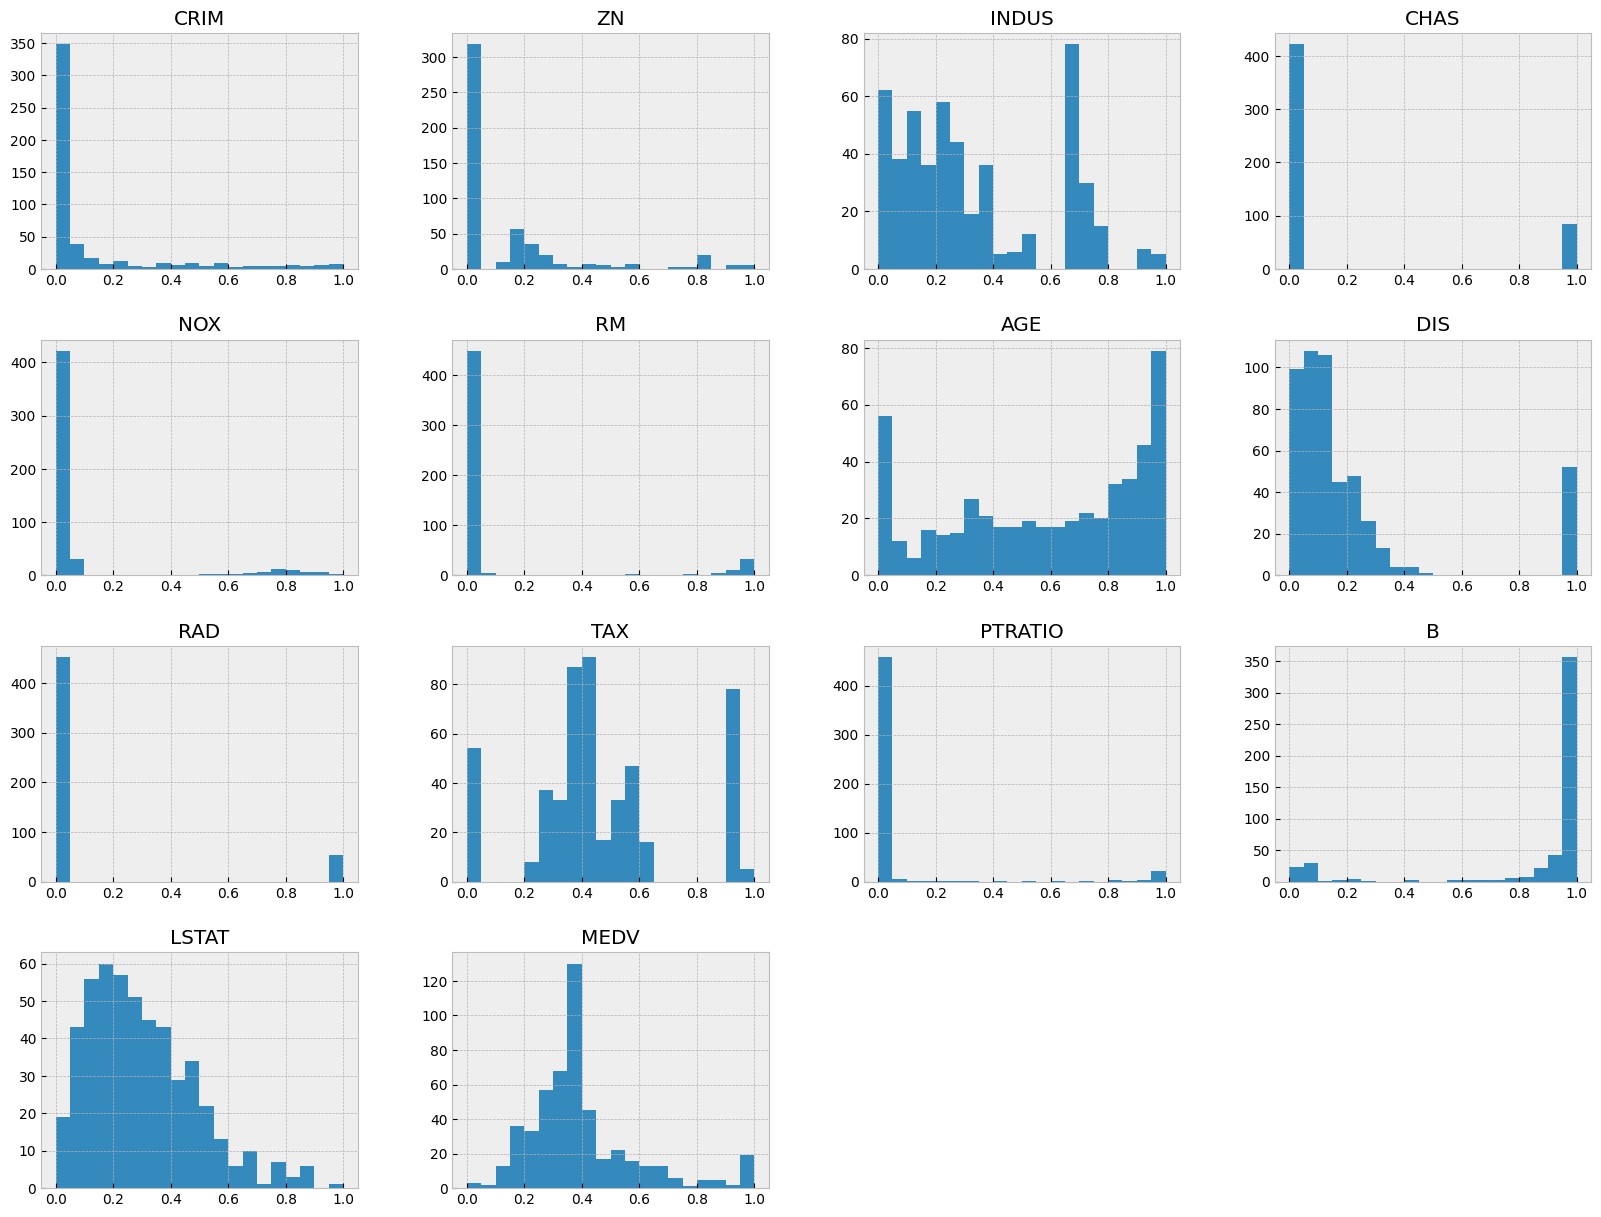

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.127346    0.132953    0.331837    0.166008    0.103374    0.125663   
std      0.240726    0.230487    0.258458    0.372456    0.237730    0.282253   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.004961    0.000000    0.124009    0.000000    0.009238    0.024891   
50%      0.014514    0.000000    0.250901    0.000000    0.022084    0.028635   
75%      0.082237    0.181000    0.652487    0.000000    0.037818    0.035131   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.582702    0.216859    0.115885    0.461954    0.101484    0.853895   
std      0.334848    0.278584    0.306078    0.261537    0.222128    0.300615   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.312179    0.058687    0.004511    0.338448    0.036520    0.937673   
50%      0.648503    0.121900    0.006015    0.415171    0.041339    0.984833   
75%      0.898597    0.224187    0.034586    0.554140    0.044636    0.996716   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean     0.300116    0.394927  
std      0.185585    0.190913  
min      0.000000    0.000000  
25%      0.157512    0.290618  
50%      0.264688    0.358124  
75%      0.406518    0.427918  
max      1.000000    1.000000

In [16]:
from sklearn.preprocessing import MinMaxScaler

def normalize(df):
    norm_scaler = MinMaxScaler()
    numerical_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    df[numerical_features] = norm_scaler.fit_transform(df[numerical_features])
    return df

norm_df = new_df1.copy()
norm_df = normalize(norm_df)
norm_df.hist(bins=20, figsize=(20,15))
plt.show()
norm_df.describe()

### Q11. For categorical features, which are usually stored as a string or object in the dataset, what pre-processings are useful in model training?

The preprocessing typically involves converting the categorical data into a numerical format. Some techniques are:
- Label Encoding:<br>
Label Encoding converts each category value to a unique integer. This is useful for ordinal categorical variables where the order matters.

- One-Hot Encoding:<br>
One-Hot Encoding creates a new binary column for each category. This is useful for nominal categorical variables where there is no ordinal relationship.

- Frequency Encoding:<br>
Frequency Encoding replaces each category with its frequency in the dataset

- Target Encoding: <br>
Target Encoding replaces each category with the mean of the target variable for that category. This method is useful when there is a strong relationship between the categorical feature and the target variable.

### Q12. Search about train, validation, and test data and explain common segmentation methods. Then divide your data into these categories. 

**Train, Validation, and Test Data**

When working with machine learning models, it is important to split the data into distinct subsets to evaluate the model's performance effectively. These subsets are typically known as the training set, validation set, and test set.

- Training Set:<br>
This is the largest subset and is used to train the model. The model learns the patterns and relationships in the data from this subset.

- Validation Set:<br>
This subset is used to tune the model's hyperparameters and make decisions about the model architecture. It helps to prevent overfitting and ensures the model generalizes well to unseen data.

- Test Set:<br>
This subset is used to evaluate the final model's performance. It acts as a proxy for how the model will perform on real-world data.


**Common Segmentation Methods**
1. Hold-Out Method:<br>
The dataset is split into three distinct parts: training, validation, and test sets.
Typical split ratios: 60% training, 20% validation, and 20% test.
Simple and fast but may not be suitable for small datasets.<br>

2. K-Fold Cross-Validation:<br>
The data is split into k equally sized folds.
The model is trained k times, each time using a different fold as the validation set and the remaining folds as the training set.
The average performance across all k trials is considered.
This method is more robust and makes better use of the data.<br>

3. Stratified Sampling:<br>
Ensures that each subset (training, validation, test) has the same proportion of class labels as the original dataset.
Useful for imbalanced datasets to maintain the distribution of the target variable.<br>

4. Time Series Split:<br>
Used for time series data where the order of data points is important.
The data is split based on time, ensuring that the training set consists of earlier time points and the validation/test sets consist of later time points.
Prevents data leakage from future to past.

In [17]:
from sklearn.model_selection import train_test_split

def split_dataset(df):
    X_train, X_remain, y_train, y_remain = train_test_split(df, df["MEDV"], test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test


X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(norm_df)
X_train = X_train.drop(columns=["MEDV"])
X_val = X_val.drop(columns=["MEDV"])
X_test = X_test.drop(columns=["MEDV"])
print("Features Training Set:")
print(X_train)
print("\nFeatures Validation Set:")
print(X_val)
print("\nFeatures Test Set:")
print(X_test)
print("\nTarget Training Set:")
print(y_train)
print("\nTarget Validation Set:")
print(y_val)
print("\nTarget Test Set:")
print(y_test)

Features Training Set:
         CRIM     ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
5    0.002995  0.000  0.078587   0.0  0.010537  0.029749  0.582250  0.215676   
116  0.013202  0.000  0.360851   0.0  0.023383  0.027116  0.721837  0.069981   
45   0.017200  0.000  0.249099   0.0  0.009094  0.021993  0.330386  0.173622   
16   0.105747  0.000  0.293439   0.0  0.022084  0.024617  0.284869  0.147308   
468  0.000000  0.181  0.000000   1.0  0.799798  0.699292  0.017918  1.000000   
..        ...    ...       ...   ...       ...       ...       ...       ...   
106  0.017177  0.000  0.308580   0.0  0.019486  0.023590  0.918068  0.047284   
270  0.030016  0.200  0.250901   0.0  0.011403  0.023797  0.414341  0.144265   
348  0.001506  0.800  0.072459   0.0  0.007217  0.031875  0.288915  0.315447   
435  0.000000  0.181  0.000000   1.0  0.901270  0.944006  0.009991  1.000000   
102  0.022953  0.000  0.308580   0.0  0.019486  0.029490  0.852321  0.069308   

          RAD   

### Q13. Search about other preprocessing methods. Mention some of these methods and use them if needed.

**1. Handling Outliers:**
- Clipping: Limits the range of the data to a specified maximum and minimum.
- Log Transformation: Applies a log transformation to reduce the impact of outliers.

**2. Polynomial Features:**
- Polynomial Features: Generates new features that are polynomial combinations of the original features.

**3. Interaction Features:**
- Interaction Features: Generates new features by multiplying pairs of features.

**4. Dimensionality Reduction:**
- PCA (Principal Component Analysis): Reduces the number of features by projecting the data to lower dimensions.
- LDA (Linear Discriminant Analysis): Reduces dimensionality while maintaining class separability.

**5. Feature Selection:**
- Variance Threshold: Removes features with low variance.
- SelectKBest: Selects the top k features based on a statistical test.


# Training, Evaluation and Tuning

## Linear Regression

### Q.14 In this project we are implementing supervised machine learning models. What are the difference between these models and unsupervised, semi-supervised and reinforcement learning models? Give an example for each.

**Supervised Learning:** Requires labeled data, learns mapping from inputs to outputs.<br>
For example:<br>
Classification: Predicting the category of an email as 'spam' or 'not spam'.<br>
**Unsupervised Learning:** Uses unlabeled data, finds patterns or structure in the data.<br>
For example:<br>
Clustering: Grouping customers into different segments based on purchasing behavior.<br>
**Semi-Supervised Learning:** Combines a small amount of labeled data with a large amount of unlabeled data.<br>
For example:<br>
Web Content Classification: Using a few labeled articles to classify a large number of unlabeled articles.<br>
**Reinforcement Learning:** Learns by interacting with an environment to maximize cumulative reward and the agent learns from the consequences of its actions.<br>
For example:<br>
Game Playing: Training a model to play chess or Go.<br>

### Q15. What is regression and what are the differences of it with classification methods?

Regression is a type of supervised learning method used in machine learning and statistics to predict a continuous numerical value based on one or more input features. The primary goal of regression analysis is to model the relationship between the dependent variable (target) and one or more independent variables (predictors or features).<br>

1. Regression focuses on predicting continuous outcomes (e.g., temperature, price, weight), while classification focuses on predicting categorical outcomes (e.g., spam/not spam, disease/no disease).<br>
2. They use different evaluation metrics to measure performance. for example reggression uses Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²), while classification uses Accuracy, Precision, Recall, F1-Score, and Area Under the ROC Curve (AUC-ROC).<br>
3. Both have distinct use cases and types of algorithms suited to their specific tasks.

### Q16. Briefly explain the relationships presented in the linear regression method.

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the slope ($\alpha$) and intercept($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\beta + \alpha * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \beta + \alpha * x_i) = 0$$
$$ \to \beta = \hat{y} - \alpha \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (- x_i y_i + \beta x_i + \alpha x_i ^ 2) = 0$$
$$ \to \Sigma (- x_i y_i + \hat{y} x_i - \alpha \hat{x} x_i+ \alpha x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \alpha = \frac{\Sigma{x_i(y_i - \hat{y})}}{\Sigma{(x_i ^ 2 - \hat{x}x_i)}} = \frac{\Sigma{x_i y_i} - \hat{y} \Sigma{x_i}}{\Sigma{x_i ^ 2} - \hat{x} \Sigma {x_i}} $$



### Q17. Complete the specified sectios in the notebook. Since the regression function is of the first order, Only one feature can be selected as the input of the function. Which feature do you think compared to Other features give us more accurate output? Explain the reason for your choice.

Probably RM or LSTAT because these two are the most correlated and dependent features to the target feature.

In [18]:
import numpy as np

def simple_linear_regression(x, y):
  x_sum = np.sum(x)    
  y_sum = np.sum(y)
  xy_sum = np.sum(x * y)
  x2_sum = np.sum(x ** 2)

  # computing slope(alpha)
  slope = (xy_sum - (y_sum / len(y)) * x_sum) / (x2_sum - (x_sum / len(x)) * x_sum)

  # computing intercept(beta)
  intercept = (y_sum / len(y)) - slope * (x_sum / len(x))

  return (slope, intercept)

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [19]:
def get_regression_predictions(x, slope, intercept):
    regression_predictions = (slope * x) + intercept
    return regression_predictions

### Q18. Study about RSS, MSE, RMSE and R2 Score methods.

1. Residual Sum of Squares (RSS): RSS is the sum of the squared differences between the actual values and the predicted values. It measures the total deviation of the response values from the fit to the response values. Lower RSS indicates a better fit of the model to the data.<br>

2. Mean Squared Error (MSE): MSE is the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is always non-negative, and values closer to zero are better. It penalizes larger errors more severely than smaller ones because of the squaring.<br>

3. Root Mean Squared Error (RMSE): RMSE is the square root of the average of squared differences between prediction and actual observation. It is effectively the standard deviation of the prediction errors. RMSE gives a sense of how much error to expect from the model in the units of the response variable. Lower RMSE values indicate better fit and fewer errors.<br>

4. R² Score (Coefficient of Determination): R² is the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides an indication of the goodness of fit of a model. An R² of 1 indicates that the regression predictions perfectly fit the data. An R² of 0 indicates that the model does not explain any of the variability in the response data around its mean.

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

In [20]:
def get_root_mean_square_error(predicted_values, actual_values):
  difference = actual_values - predicted_values
  root_mean_square_error = np.sqrt(np.sum(difference ** 2) / len(predicted_values))
  return root_mean_square_error

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In [21]:
def get_r2_score(predicted_values, actual_values):
  SSres = np.sum((actual_values - predicted_values) ** 2)
  SStot = np.sum((actual_values - np.mean(actual_values)) ** 2)
  r2_score = 1 - (SSres / SStot)
  return r2_score

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [22]:
for feature in columns[:-1]:
    slope, intercept = simple_linear_regression(X_train[feature], y_train)
    
    y_val_pred = get_regression_predictions(X_val[feature], slope, intercept)
    val_rmse = get_root_mean_square_error(y_val_pred, y_val)
    val_r2 = get_r2_score(y_val_pred, y_val)

    y_test_pred = get_regression_predictions(X_test[feature], slope, intercept)
    test_rmse = get_root_mean_square_error(y_test_pred, y_test)
    test_r2 = get_r2_score(y_test_pred, y_test)

    print("Feature  :", feature)
    print("Slope:", slope)
    print("Intercept    :", intercept)

    print(f"Validation Mean Squared Error: {val_rmse}")
    print(f"Validation R-squared: {val_r2}")

    print(f"Test Mean Squared Error: {test_rmse}")
    print(f"Test R-squared: {test_r2}")

    print("_______________________________________________")



Feature  : CRIM
Slope: -0.2278294122357163
Intercept    : 0.4338018263471025
Validation Mean Squared Error: 0.17513726114780262
Validation R-squared: 0.024582353871642426
Test Mean Squared Error: 0.17529669781275467
Test R-squared: 0.024238912920011124
_______________________________________________
Feature  : ZN
Slope: 0.25180150931563705
Intercept    : 0.37144227012485537
Validation Mean Squared Error: 0.16438828983090195
Validation R-squared: 0.140639761938393
Test Mean Squared Error: 0.1652748684237783
Test R-squared: 0.13261947929044815
_______________________________________________
Feature  : INDUS
Slope: -0.23253044448376115
Intercept    : 0.48238588508346025
Validation Mean Squared Error: 0.16023221732860374
Validation R-squared: 0.18354324661706567
Test Mean Squared Error: 0.1703293203445588
Test R-squared: 0.07875561998698011
_______________________________________________
Feature  : CHAS
Slope: 0.03380164469685505
Intercept    : 0.3993830787309048
Validation Mean Squared Er

### Q19. Evaluate the predictede values with RMSE and R2 Score. Do the operation on other operations as well. What do you infer from the obtained values?

LSTAT is the best feature for predicting the linear regression function. Because it has the least Root Mean Square Error and the greatest R2 score in the test set.

### Q20. Compare the predicted values ​​with the actual values ​​using scatter plot.

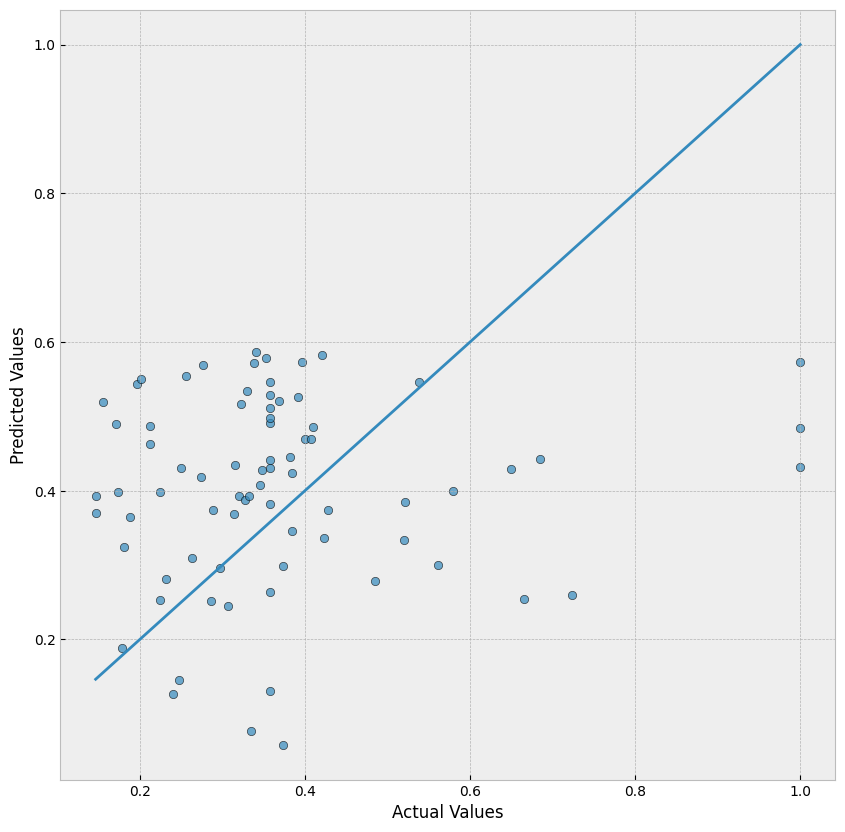

In [23]:
slope, intercept = simple_linear_regression(X_train["LSTAT"], y_train)    
y_test_pred = get_regression_predictions(X_val["LSTAT"], slope, intercept)

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

## Classification

### Q26. Desicion Tree and K-Nearest-Neighbor

Dividing MEDV column into deciles

In [24]:
target_col = norm_df["MEDV"].copy() 
deciles = np.percentile(target_col.sort_values(), np.arange(10, 100, 10)) 
 
def classify(value): 
    if value <= deciles[1]: 
        return 0 
    elif value >= deciles[7]: 
        return 2 
    else: 
        return 1 

# House Decile
norm_df["HD"] = norm_df["MEDV"].apply(classify)
norm_df['HD'] = norm_df['HD'].astype('category')
print(norm_df["HD"])

0      1
1      1
2      2
3      2
4      2
      ..
501    1
502    1
503    1
504    1
505    0
Name: HD, Length: 506, dtype: category
Categories (3, int64): [0, 1, 2]


Using KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

def new_split_dataset(df):
    X_train, X_remain, y_train, y_remain = train_test_split(df, df["HD"], test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Defining paraneter for k
K = 1

new_X_train, new_X_val, new_X_test, new_y_train, new_y_val, new_y_test = new_split_dataset(norm_df)
new_X_train = new_X_train.drop(columns=["MEDV", "HD"])
new_X_val = new_X_val.drop(columns=["MEDV", "HD"])
new_X_test = new_X_test.drop(columns=["MEDV", "HD"])
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(new_X_train, new_y_train)
knn_y_val_pred = knn.predict(new_X_val)
knn_y_test_pred = knn.predict(new_X_test)
for i in new_y_val:
    print(i, end=" ")
print()
for i in knn_y_val_pred:
    print(i, end=" ")

0 0 2 0 1 1 1 1 1 1 1 1 2 1 1 0 0 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 2 1 1 1 0 0 2 2 0 1 1 2 1 1 1 1 2 2 0 2 1 1 2 0 0 1 1 2 1 1 1 0 1 1 1 1 1 1 
0 0 2 0 1 1 1 1 1 2 0 1 2 0 1 0 1 1 1 1 1 1 2 0 0 1 1 1 1 1 1 1 1 1 2 1 0 0 2 2 1 2 0 1 1 2 0 1 1 2 1 1 0 1 2 2 0 2 1 1 2 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 

Now we evaluate our predictions

In [26]:
from sklearn.metrics import classification_report

knn_report_val = classification_report(new_y_val, knn_y_val_pred)
print('Classification Report For Validation Set:')
print(knn_report_val)

knn_report_test = classification_report(new_y_test, knn_y_test_pred)
print('\nClassification Report For Validation Set:')
print(knn_report_test)

Classification Report For Validation Set:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.87      0.81      0.84        48
           2       0.71      0.83      0.77        12

    accuracy                           0.80        76
   macro avg       0.76      0.80      0.78        76
weighted avg       0.81      0.80      0.80        76


Classification Report For Validation Set:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.83      0.91      0.87        44
           2       0.86      0.50      0.63        12

    accuracy                           0.83        76
   macro avg       0.83      0.75      0.78        76
weighted avg       0.83      0.83      0.82        76



Using Disicion Tree

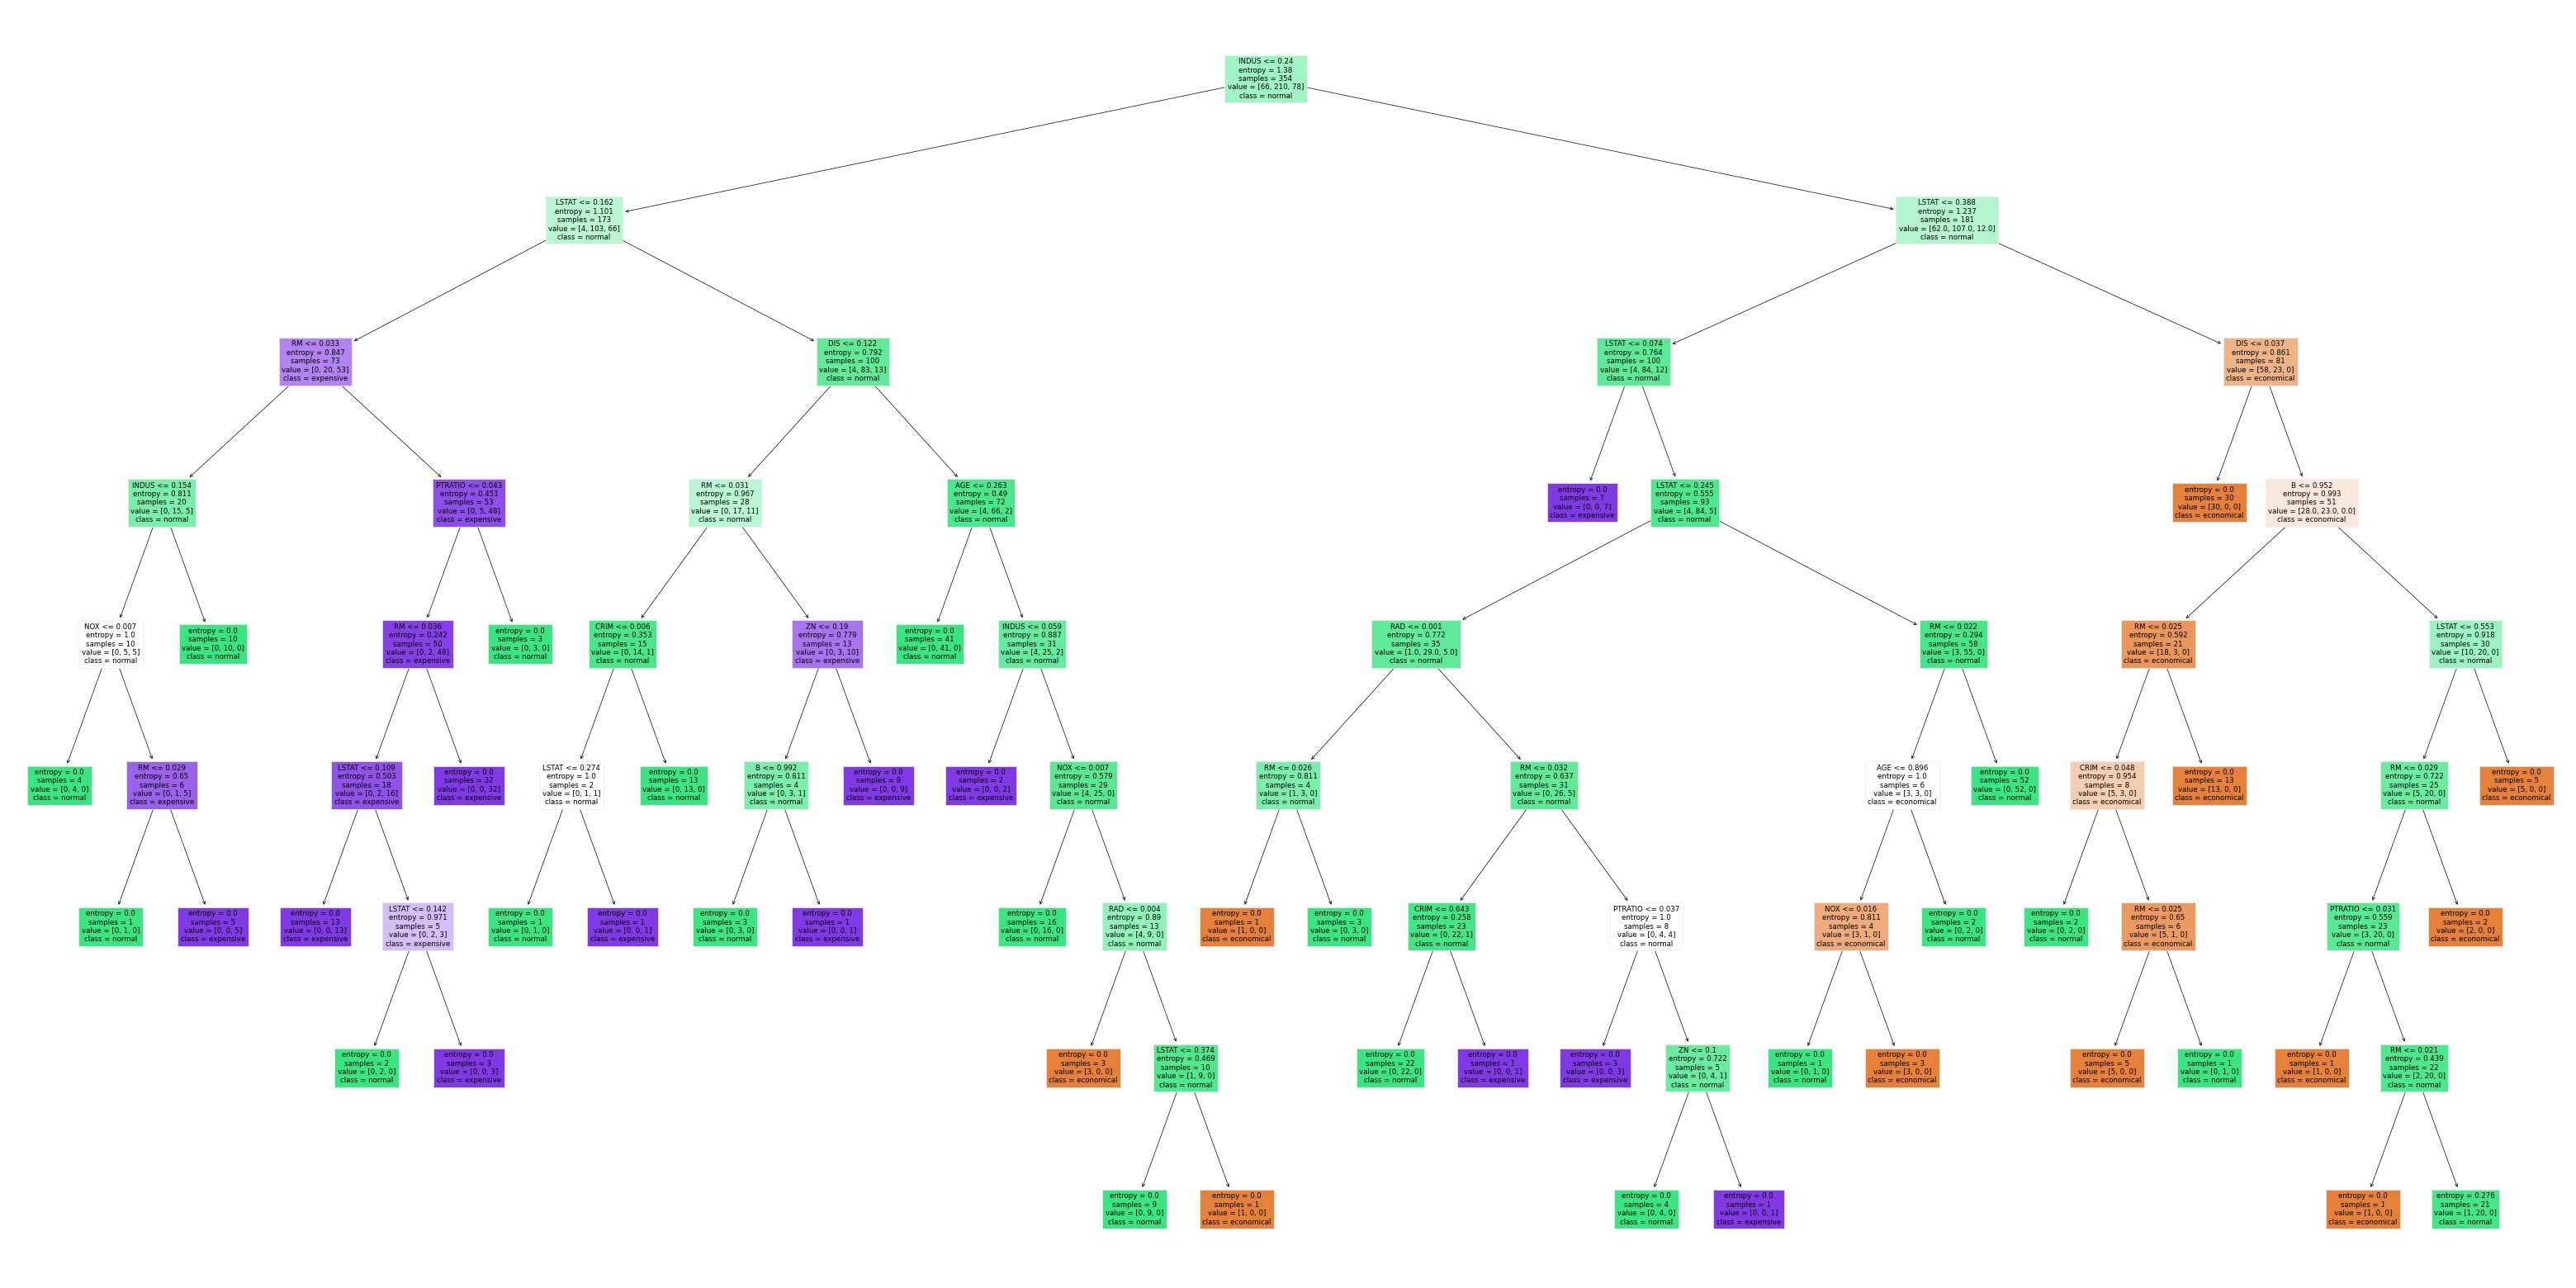

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc_train_features = columns[:-1]

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=8,  min_samples_split=2, min_samples_leaf=1, max_features=8, random_state=10) 
dtc.fit(new_X_train, new_y_train) 
dtc_y_val_pred = dtc.predict(new_X_val)
dtc_y_test_pred = dtc.predict(new_X_test)
 
plt.figure(figsize=(40, 20)) 
tree.plot_tree(dtc, filled=True, feature_names=dtc_train_features, class_names=["economical", "normal", "expensive"]) 
plt.show()

Now we evaluate our predictions

In [28]:
dtc_report_val = classification_report(new_y_val, dtc_y_val_pred)
print('\nClassification Report For Validation Set:')
print(dtc_report_val)

dtc_report_test = classification_report(new_y_test, dtc_y_test_pred)
print('\nClassification Report For Validation Set:')
print(dtc_report_test)


Classification Report For Validation Set:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        16
           1       0.84      0.85      0.85        48
           2       0.91      0.83      0.87        12

    accuracy                           0.80        76
   macro avg       0.79      0.77      0.78        76
weighted avg       0.80      0.80      0.80        76


Classification Report For Validation Set:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.77      0.93      0.85        44
           2       1.00      0.58      0.74        12

    accuracy                           0.80        76
   macro avg       0.86      0.72      0.77        76
weighted avg       0.82      0.80      0.80        76



### Q27. GridSearchCV

GridSearchCV for K-Nearest-Neighbor

In [29]:
from sklearn.model_selection import GridSearchCV

knn_param_grid = {'n_neighbors': [i for i in range(1, 16)]}
grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring='accuracy')
grid_search.fit(new_X_train, new_y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Best Parameters: {'n_neighbors': 3}
Best Score: 0.8051106639839034


GridSearchCV for Deisicion Tree

In [30]:
from sklearn.model_selection import GridSearchCV

dtc_param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5,6,7,8,9,10,11],
    'min_samples_split': [2,3,4,5,6,7],
    'max_features': [5,6,7,8,9,10,11],
}
grid_search = GridSearchCV(estimator=dtc, param_grid=dtc_param_grid, cv=5, scoring='accuracy')
grid_search.fit(new_X_train, new_y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 6, 'min_samples_split': 2}
Best Score: 0.8529979879275654


## Ensemble Methods

Using random forest classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=8,  min_samples_split=2, min_samples_leaf=1, max_features=8, random_state=10) 
dtc.fit(new_X_train, new_y_train) 
dtc_y_val_pred = dtc.predict(new_X_val)
dtc_y_test_pred = dtc.predict(new_X_test)

rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=None, min_samples_split=5) 
rf.fit(new_X_train, new_y_train) 
rf_y_val_pred = rf.predict(new_X_val) 
rf_y_test_pred = rf.predict(new_X_test) 

Now we evaluate our predictions

In [32]:
rf_report_val = classification_report(new_y_val, rf_y_val_pred)
print('\nClassification Report For Validation Set:')
print(rf_report_val)

rf_report_test = classification_report(new_y_test, rf_y_test_pred)
print('\nClassification Report For Validation Set:')
print(rf_report_test)


Classification Report For Validation Set:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.90      0.94      0.92        48
           2       0.92      0.92      0.92        12

    accuracy                           0.89        76
   macro avg       0.89      0.87      0.88        76
weighted avg       0.89      0.89      0.89        76


Classification Report For Validation Set:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.84      0.93      0.88        44
           2       1.00      0.75      0.86        12

    accuracy                           0.86        76
   macro avg       0.89      0.81      0.84        76
weighted avg       0.86      0.86      0.85        76



## Suport Vector Machine

Using RBF kernel

In [33]:
from sklearn.svm import SVC

rbf_kernel = SVC(kernel='rbf', C=1.0) 
rbf_kernel.fit(new_X_train, new_y_train) 
rbf_kernel_y_val_pred = rbf_kernel.predict(new_X_val)
rbf_kernel_y_test_pred = rbf_kernel.predict(new_X_test) 

In [34]:
from sklearn.metrics import confusion_matrix

rbf_kernel_conf_matrix_val = confusion_matrix(new_y_val, rbf_kernel_y_val_pred) 
print('Confusion Matrix For Validation Set of RBF kernel:')
print(rbf_kernel_conf_matrix_val)

rbf_kernel_conf_matrix_test = confusion_matrix(new_y_test, rbf_kernel_y_test_pred) 
print('\nConfusion Matrix For Validation Set of RBF kernel:')
print(rbf_kernel_conf_matrix_test) 
 
rbf_kernel_report_val = classification_report(new_y_val, rbf_kernel_y_val_pred)
print('\nClassification Report For Validation Set of RBF kernel:')
print(rbf_kernel_report_val)

rbf_kernel_report_test = classification_report(new_y_test, rbf_kernel_y_test_pred)
print('\nClassification Report For Validation Set of RBF kernel:')
print(rbf_kernel_report_test)

Confusion Matrix For Validation Set of RBF kernel:
[[ 7  9  0]
 [ 1 45  2]
 [ 0  2 10]]

Confusion Matrix For Validation Set of RBF kernel:
[[14  6  0]
 [ 1 40  3]
 [ 1  5  6]]

Classification Report For Validation Set of RBF kernel:
              precision    recall  f1-score   support

           0       0.88      0.44      0.58        16
           1       0.80      0.94      0.87        48
           2       0.83      0.83      0.83        12

    accuracy                           0.82        76
   macro avg       0.84      0.74      0.76        76
weighted avg       0.82      0.82      0.80        76


Classification Report For Validation Set of RBF kernel:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.78      0.91      0.84        44
           2       0.67      0.50      0.57        12

    accuracy                           0.79        76
   macro avg       0.78      0.70      0.73        76
we

In [35]:
linear_kernel = SVC(kernel='linear', C=1.0) 
linear_kernel.fit(new_X_train, new_y_train) 
linear_kernel_y_val_pred = linear_kernel.predict(new_X_val)
linear_kernel_y_test_pred = linear_kernel.predict(new_X_test)

In [36]:
linear_kernel_conf_matrix_val = confusion_matrix(new_y_val, linear_kernel_y_val_pred) 
print(f'Confusion Matrix For Validation Set of Linear kernel:')
print(linear_kernel_conf_matrix_val)

linear_kernel_conf_matrix_test = confusion_matrix(new_y_test, linear_kernel_y_test_pred) 
print('\nConfusion Matrix For Validation Set of Linear kernel:')
print(linear_kernel_conf_matrix_test) 
 
linear_kernel_report_val = classification_report(new_y_val, linear_kernel_y_val_pred)
print('\nClassification Report For Validation Set of Linear kernel:')
print(linear_kernel_report_val)

linear_kernel_report_test = classification_report(new_y_test, linear_kernel_y_test_pred)
print('\nClassification Report For Validation Set of Linear kernel:')
print(linear_kernel_report_test)

Confusion Matrix For Validation Set of Linear kernel:
[[ 7  9  0]
 [ 1 45  2]
 [ 0  3  9]]

Confusion Matrix For Validation Set of Linear kernel:
[[14  6  0]
 [ 3 38  3]
 [ 0  6  6]]

Classification Report For Validation Set of Linear kernel:
              precision    recall  f1-score   support

           0       0.88      0.44      0.58        16
           1       0.79      0.94      0.86        48
           2       0.82      0.75      0.78        12

    accuracy                           0.80        76
   macro avg       0.83      0.71      0.74        76
weighted avg       0.81      0.80      0.79        76


Classification Report For Validation Set of Linear kernel:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.76      0.86      0.81        44
           2       0.67      0.50      0.57        12

    accuracy                           0.76        76
   macro avg       0.75      0.69      0.71 